In [ ]:
import numpy as np
import matplotlib.pyplot as plt



2.0 2.0
000:1.200:2.64E+00
001:2.640:2.41E+00
002:1.488:2.26E+00
003:2.410:2.17E+00
004:1.672:2.11E+00
005:2.262:2.07E+00
006:1.790:2.04E+00
007:2.168:2.03E+00
008:1.866:2.02E+00
009:2.107:2.01E+00


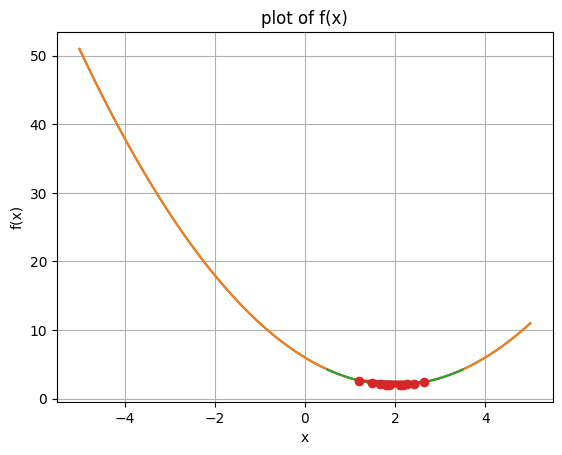

Text(0.5, 1.0, 'plot of f(x)')

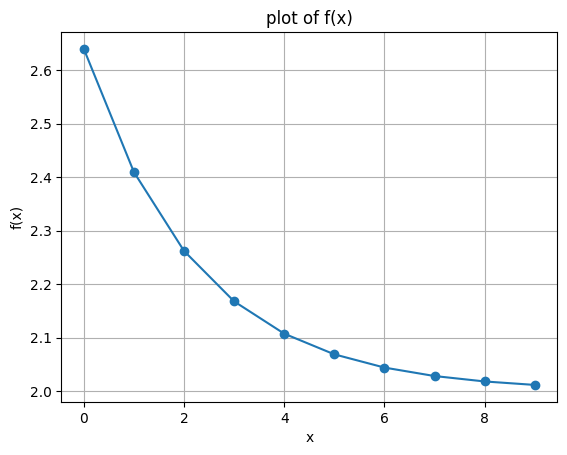

In [7]:
#Gradient descent실습 : Learning rate
import numpy as np
import matplotlib.pyplot as plt
def f(x):
    return x**2 -4*x +6

NumberOfPoints=101
#x는 -5부터 5까지 101개의 등간격 값들로 구성된 배열
x = np.linspace(-5., 5, NumberOfPoints)
fx = f(x)

plt.plot(x,fx)
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('plot of f(x)')
# plt.show()

# 배열 fx에서 최소값의 인덱스(index) 반환.
xid = np.argmin(fx)
# 최소가 되는 x값 (xopt) 구함
xopt = x[xid]
print(xopt, f(xopt))

plt.plot(x,fx)
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('plot of f(x)')

plt.plot(xopt, f(xopt), 'xr')
# plt.show()

# 기울기
def grad_fx(x):
    return 2*x -4

# w보정
def steepest_descent(func, grad_func, x0, learning_rate=0.01, Maxlter=10, verbose=True):
    paths = []
    for i in range(Maxlter):
        x1 = x0 - learning_rate * grad_func(x0) # -를 해주는 이유: 기울기가 최소인 (안정적인 w값으로)
        if verbose:
            print('{0:003d}:{1:4.3f}:{2:4.2E}'.format(i, x1, func(x1)))
        x0 = x1
        paths.append(x0)
    return(x0, func(x0), paths)

# # 초기값 0, leanring rate을 1.2로 한경우
# xopt, fopt, paths = steepest_descent(f, grad_fx, 0.0, learning_rate = 1.2)

# x = np.linspace(0.5, 2.5, 1000)
# paths = np.array(paths)
# plt.plot(x,f(x))
# plt.grid()
# plt.xlabel('x')
# plt.ylabel('f(x)')
# plt.title('plot of f(x)')

# plt.plot(paths, f(paths), 'o-')
# plt.show()

# plt.plot(f(paths), 'o-')
# plt.grid()
# plt.xlabel('x')
# plt.ylabel('f(x)')
# plt.title('plot of f(x)')

# # 초기값 1, leanring rate을 1로 한경우
# xopt, fopt, paths = steepest_descent(f, grad_fx, 1.0, learning_rate = 1)

# x = np.linspace(0.5, 3.5, 1000)
# paths = np.array(paths)
# plt.plot(x,f(x))
# plt.grid()
# plt.xlabel('x')
# plt.ylabel('f(x)')
# plt.title('plot of f(x)')

# plt.plot(paths, f(paths), 'o-')
# plt.show()

# plt.plot(f(paths), 'o-')
# plt.grid()
# plt.xlabel('x')
# plt.ylabel('f(x)')
# plt.title('plot of f(x)')

# # 초기값 1, leanring rate을 0.001로 한경우
# xopt, fopt, paths = steepest_descent(f, grad_fx, 1.0, learning_rate = 0.001)

# x = np.linspace(0.5, 3.5, 1000)
# paths = np.array(paths)
# plt.plot(x,f(x))
# plt.grid()
# plt.xlabel('x')
# plt.ylabel('f(x)')
# plt.title('plot of f(x)')

# plt.plot(paths, f(paths), 'o-')
# plt.show()

# plt.plot(f(paths), 'o-')
# plt.grid()
# plt.xlabel('x')
# plt.ylabel('f(x)')
# plt.title('plot of f(x)')

# 초기값 3, leanring rate을 0.9로 한경우
xopt, fopt, paths = steepest_descent(f, grad_fx, 3.0, learning_rate = 0.9)

x = np.linspace(0.5, 3.5, 1000)
paths = np.array(paths)
plt.plot(x,f(x))
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('plot of f(x)')

plt.plot(paths, f(paths), 'o-')
plt.show()

plt.plot(f(paths), 'o-')
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('plot of f(x)')



In [ ]:
# #Gradient descent실습 : 2차원 확장
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from visualize import contour_with_quiver
from visualize import contour_with_path
from visualize import surf

xmin, xmax, xstep = -4.0, 4.0, .25
ymin, ymax, ystep = -4.0, 4.0, .25

x, y = np.meshgrid(np.arange(xmin, xmax + xstep, xstep),
                   np.arange(ymin, ymax+ ystep, ystep))

f = lambda x,y : (x-2)**2 + (y-2)**2
z = f(x,y)
minima = np.array([2.,2.])

f(*minima)

minima_ = minima.reshape(-1, 1)
print(minima, minima_)
surf(f,x,y,minima=minima_)

grad_f_x = lambda x, y : 2*(x-2)
grad_f_y = lambda x, y : 2*(y-2)

contour_with_quiver(f,x,y, grad_f_x, grad_f_y, minima=minima_)

def steepest_descent_twod(func, gradx, grady, x0, Maxlter=10, learning_rate=0.25, verbose=True):
    paths=[x0]
    fval_paths=[f(x0[0], x0[1])]
    for i in range(Maxlter):
        grad = np.array([grad_f_x(*x0), grad_f_x(*x0)])
        x1 = x0 - learning_rate * grad
        fval = (f*x1)
        if verbose:
            print(i ,x1, fval)
        x0 = x1
        paths.append(x0)
        fval_paths.appen(fval)
    paths = np.array(paths)
    paths = np.array(np.matrix(paths).T)
    fval_paths = np.array(fval_paths)
    return(x0, fval, paths, fval_paths)

x0 = np.array([-2,-2])
xopt, fopt, paths, fval_paths = steepest_descent_twod(f, grad_f_x, grad_f_y, x0)

contour_with_path(f,x,y,paths, minima=np.array([[2],[2]]))


SyntaxError: incomplete input (3556328043.py, line 50)

[-2.  -1.6 -1.2 -0.8 -0.4  0.   0.4  0.8  1.2  1.6  2. ]
[-2.  -1.6 -1.2 -0.8 -0.4  0.   0.4  0.8  1.2  1.6  2. ]
[[-2.  -1.6 -1.2 -0.8 -0.4  0.   0.4  0.8  1.2  1.6  2. ]
 [-2.  -1.6 -1.2 -0.8 -0.4  0.   0.4  0.8  1.2  1.6  2. ]
 [-2.  -1.6 -1.2 -0.8 -0.4  0.   0.4  0.8  1.2  1.6  2. ]
 [-2.  -1.6 -1.2 -0.8 -0.4  0.   0.4  0.8  1.2  1.6  2. ]
 [-2.  -1.6 -1.2 -0.8 -0.4  0.   0.4  0.8  1.2  1.6  2. ]
 [-2.  -1.6 -1.2 -0.8 -0.4  0.   0.4  0.8  1.2  1.6  2. ]
 [-2.  -1.6 -1.2 -0.8 -0.4  0.   0.4  0.8  1.2  1.6  2. ]
 [-2.  -1.6 -1.2 -0.8 -0.4  0.   0.4  0.8  1.2  1.6  2. ]
 [-2.  -1.6 -1.2 -0.8 -0.4  0.   0.4  0.8  1.2  1.6  2. ]
 [-2.  -1.6 -1.2 -0.8 -0.4  0.   0.4  0.8  1.2  1.6  2. ]
 [-2.  -1.6 -1.2 -0.8 -0.4  0.   0.4  0.8  1.2  1.6  2. ]]
[[-2.  -2.  -2.  -2.  -2.  -2.  -2.  -2.  -2.  -2.  -2. ]
 [-1.6 -1.6 -1.6 -1.6 -1.6 -1.6 -1.6 -1.6 -1.6 -1.6 -1.6]
 [-1.2 -1.2 -1.2 -1.2 -1.2 -1.2 -1.2 -1.2 -1.2 -1.2 -1.2]
 [-0.8 -0.8 -0.8 -0.8 -0.8 -0.8 -0.8 -0.8 -0.8 -0.8 -0.8]
 [-0.4 -0.4 -0.

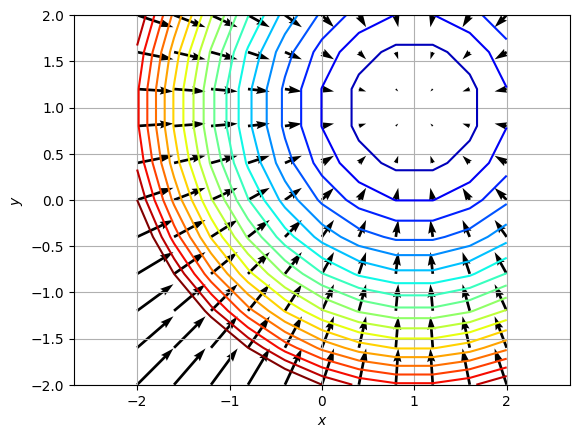

In [15]:
#vector
import numpy as np
import matplotlib.pyplot as plt

#Create meshgrid
x = np.linspace(-2, 2, 11)
y = np.linspace(-2, 2, 11)
print(x)
print(y)

x, y = np.meshgrid(x, y)
print(x)
print(y)

#Function and gradient
f = lambda x, y: (x - 1)**2 + (y - 1)**2
z = f(x, y)
print(z)

grad_f_x = lambda x, y: 2 * (x - 1)
grad_f_y = lambda x, y: 2 * (y - 1)

dz_dx = grad_f_x(x, y)
dz_dy = grad_f_y(x, y)

#Plotting
fig, ax = plt.subplots()
contour = ax.contour(x, y, z, levels=np.linspace(0, 10, 20), cmap=plt.cm.jet)
ax.quiver(x, y, -dz_dx, -dz_dy)
ax.grid()
ax.axis('equal')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
plt.show()